In [3]:
import pandas as pd
import os

### Galli code ###

#files = [file for file in os.listdir('./Sales_data/')]

#all_months_data = pd.DataFrame()

#for file in files:
    #df = pd.read_csv("./Sales_Data/"+file)
    #all_months_data = pd.concat([all_months_data, df])
        
#all_months_data.to_csv("concat_data.csv", index=False)

### Besseling code ###
### merge 12 months of business data ###
#path = r'./Sales_data/'
#all_files = glob.glob(path + "Sales_*.csv")
#df = pd.concat((pd.read_csv(f) for f in all_files))

#df.to_csv("concat_df.csv", index=False)

all_data = pd.read_csv("concat_df.csv")

                                   
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


### drop rows of NaNs ###

In [4]:
nan_df = all_data[all_data.isna().any(axis=1)]

all_data = all_data.dropna(how='all')

all_data.head()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


### change columns type ###

In [5]:
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered'], errors='coerce')

all_data['Price Each'] = pd.to_numeric(all_data['Price Each'], errors='coerce')

all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2.0,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1.0,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1.0,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1.0,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1.0,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


### remove 'Or' from Order Date ###

In [6]:
all_data = all_data[all_data['Order Date'].str[0:2] != 'Or']

all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2.0,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1.0,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1.0,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1.0,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1.0,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


### Add column 'Month' and change type to int32 ###

In [13]:
all_data['Month'] = all_data['Order Date'].str[0:2]

all_data['Month'] = pd.to_numeric(all_data['Month'])

all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2.0,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1.0,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1.0,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1.0,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1.0,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


### add sales column

In [14]:
all_data['Sales'] = all_data["Quantity Ordered"] * all_data["Price Each"]

all_data.head()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2.0,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1.0,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1.0,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1.0,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1.0,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


### What was the best month for sales? ###

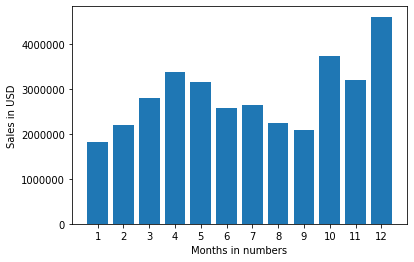

In [15]:
import matplotlib.pyplot as plt

results = all_data.groupby(['Month']).sum()

months = range(1,13)

plt.bar(months, results['Sales'])
plt.xticks(months)
_ = plt.xlabel('Months in numbers')
_ = plt.ylabel('Sales in USD')
plt.show()


### how much was earned in the best month? 

In [16]:
best_month = results['Sales'].max()

print("Result for december: " + str(best_month))


Result for december: 4613443.340001534


### add city column using apply and lambda

In [17]:
def get_city(address):
    return address.split(', ')[1]

def get_state(state_code):
    return state_code.split(',')[2].split(' ')[1]

### f strings instead of + ###

all_data['City'] = all_data['Purchase Address'].apply(lambda x:f'{get_city(x)} ({get_state(x)})')

all_data.head(100)


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2.0,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX)
2,176559,Bose SoundSport Headphones,1.0,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA)
3,176560,Google Phone,1.0,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA)
4,176560,Wired Headphones,1.0,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)
5,176561,Wired Headphones,1.0,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)
...,...,...,...,...,...,...,...,...,...
96,176649,USB-C Charging Cable,1.0,11.95,04/09/19 08:49,"702 11th St, San Francisco, CA 94016",4,11.95,San Francisco (CA)
97,176650,Lightning Charging Cable,1.0,14.95,04/12/19 16:47,"153 River St, Boston, MA 02215",4,14.95,Boston (MA)
98,176651,iPhone,1.0,700.00,04/07/19 13:14,"997 South St, Boston, MA 02215",4,700.00,Boston (MA)
99,176652,LG Washing Machine,1.0,600.00,04/09/19 20:04,"502 14th St, New York City, NY 10001",4,600.00,New York City (NY)


### what city has the highest number of sales?

In [18]:
results = all_data.groupby('City').sum()

results


,Quantity Ordered,Price Each,Month,Sales
City,,,,
Atlanta (GA),16602.0,2.779908e+06,104794,2.795499e+06
Austin (TX),11153.0,1.809874e+06,69829,1.819582e+06
Boston (MA),22528.0,3.637410e+06,141112,3.661642e+06
Dallas (TX),16730.0,2.752628e+06,104620,2.767975e+06
Los Angeles (CA),33289.0,5.421435e+06,208325,5.452571e+06
New York City (NY),27932.0,4.635371e+06,175741,4.664317e+06
Portland (ME),2750.0,4.471893e+05,17144,4.497583e+05
Portland (OR),11303.0,1.860558e+06,70621,1.870732e+06
San Francisco (CA),50239.0,8.211462e+06,315520,8.262204e+06


### plot city earnings

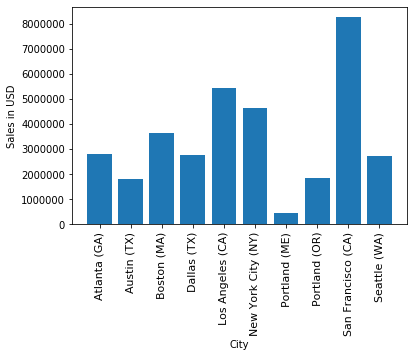

In [19]:
city = [city for city, df in all_data.groupby('City')]

plt.bar(city, results['Sales'], )
plt.xticks(city, rotation='vertical', size=11)
_ = plt.xlabel('City')
_ = plt.ylabel('Sales in USD')

plt.show() 

### what time should we display advertisements to maximize likelihood of customer's buying product?

In [7]:
all_data.head()


import datetime as dt

all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])

all_data.head()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2.0,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1.0,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1.0,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1.0,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1.0,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001"


In [22]:
all_data['Hour'] = all_data['Order Date'].dt.hour

all_data['Minute'] = all_data['Order Date'].dt.minute

all_data.head()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,176558,USB-C Charging Cable,2.0,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX),8,46
2,176559,Bose SoundSport Headphones,1.0,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA),22,30
3,176560,Google Phone,1.0,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14,38
4,176560,Wired Headphones,1.0,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14,38
5,176561,Wired Headphones,1.0,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),9,27


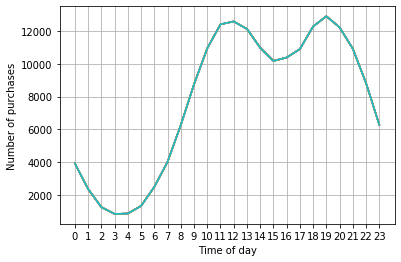

In [23]:
hour = [hour for hour, df in all_data.groupby('Hour')]


plt.plot(hour, all_data.groupby('Hour').count())

all_data.groupby('Hour').count()
plt.xticks(hour)
_ = plt.xlabel('Time of day')
_ = plt.ylabel('Number of purchases')
plt.grid()

plt.show()

### What products are most often sold together? ###

In [24]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,176558,USB-C Charging Cable,2.0,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX),8,46
2,176559,Bose SoundSport Headphones,1.0,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA),22,30
3,176560,Google Phone,1.0,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14,38
4,176560,Wired Headphones,1.0,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14,38
5,176561,Wired Headphones,1.0,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),9,27


In [25]:
all_data.head()

df = all_data[all_data['Order ID'].duplicated(keep=False)]

df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ', '.join(x))

df = df[['Order ID', 'Grouped']].drop_duplicates()

df.head()


C:\Users\Dennis Besseling\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,Order ID,Grouped
3,176560,"Google Phone, Wired Headphones"
18,176574,"Google Phone, USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones, Bose SoundSport He..."
32,176586,"AAA Batteries (4-pack), Google Phone"
119,176672,"Lightning Charging Cable, USB-C Charging Cable"


### Count duplicates 

In [26]:
from itertools import combinations
from collections import Counter


count = Counter()

for row in df['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))
    
for key, value in count.most_common(10):
    print(key, value)

('iPhone', ' Lightning Charging Cable') 1005
('Google Phone', ' USB-C Charging Cable') 987
('iPhone', ' Wired Headphones') 447
('Google Phone', ' Wired Headphones') 414
('Vareebadd Phone', ' USB-C Charging Cable') 361
('iPhone', ' Apple Airpods Headphones') 360
('Google Phone', ' Bose SoundSport Headphones') 220
('Vareebadd Phone', ' Wired Headphones') 143
(' USB-C Charging Cable', ' Wired Headphones') 120
('Vareebadd Phone', ' Bose SoundSport Headphones') 80


### what product sold the most? Why do you think it sold the most?

In [20]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,176558,USB-C Charging Cable,2.0,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX),8,46
2,176559,Bose SoundSport Headphones,1.0,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA),22,30
3,176560,Google Phone,1.0,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14,38
4,176560,Wired Headphones,1.0,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14,38
5,176561,Wired Headphones,1.0,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),9,27


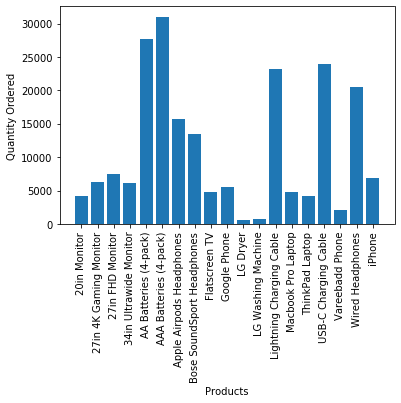

In [27]:
products_group = all_data.groupby('Product')

quantity_ordered = products_group.sum()['Quantity Ordered']

products = [product for product, df in products_group]

plt.bar(products, quantity_ordered)
plt.xticks(products, rotation='vertical', size=10)
_ = plt.xlabel('Products')
_ = plt.ylabel('Quantity Ordered')
plt.show()



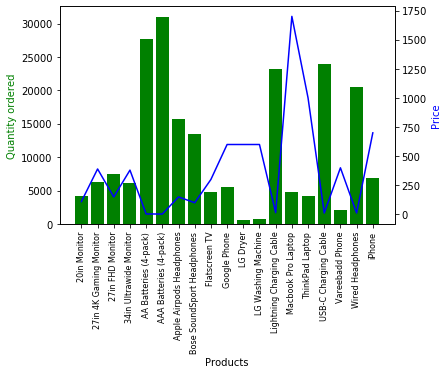

In [28]:
prices = all_data.groupby('Product').mean()['Price Each']
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.bar(products, quantity_ordered, color='g')
ax2.plot(products, prices, 'b-')
ax1.set_xlabel('Products')
ax1.set_ylabel('Quantity ordered', color='g')
ax2.set_ylabel('Price', color='b')
ax1.set_xticklabels(products, rotation='vertical', size=8)
plt.show()




### create dict with key:value pair (product and price)

In [29]:
product_and_price =  all_data[['Product', 'Price Each']].drop_duplicates()

print(product_and_price)


                        Product  Price Each
0          USB-C Charging Cable       11.95
2    Bose SoundSport Headphones       99.99
3                  Google Phone      600.00
4              Wired Headphones       11.99
9            Macbook Pro Laptop     1700.00
12     Lightning Charging Cable       14.95
13       27in 4K Gaming Monitor      389.99
14        AA Batteries (4-pack)        3.84
16     Apple Airpods Headphones      150.00
20       AAA Batteries (4-pack)        2.99
26                       iPhone      700.00
29                Flatscreen TV      300.00
34             27in FHD Monitor      149.99
35                 20in Monitor      109.99
53                     LG Dryer      600.00
80              ThinkPad Laptop      999.99
82              Vareebadd Phone      400.00
99           LG Washing Machine      600.00
109      34in Ultrawide Monitor      379.99


In [35]:
product_key = product_and_price['Product']
values = product_and_price['Price Each']

dictionary = dict(zip(product_key, values))

dictionary




{'USB-C Charging Cable': 11.95,
 'Bose SoundSport Headphones': 99.99,
 'Google Phone': 600.0,
 'Wired Headphones': 11.99,
 'Macbook Pro Laptop': 1700.0,
 'Lightning Charging Cable': 14.95,
 '27in 4K Gaming Monitor': 389.99,
 'AA Batteries (4-pack)': 3.84,
 'Apple Airpods Headphones': 150.0,
 'AAA Batteries (4-pack)': 2.99,
 'iPhone': 700.0,
 'Flatscreen TV': 300.0,
 '27in FHD Monitor': 149.99,
 '20in Monitor': 109.99,
 'LG Dryer': 600.0,
 'ThinkPad Laptop': 999.99,
 'Vareebadd Phone': 400.0,
 'LG Washing Machine': 600.0,
 '34in Ultrawide Monitor': 379.99}